神经网络如果仅仅是由线性的卷积运算堆叠组成，则其无法形成复杂的表达空间，也就很难提取出高语义的信息，因此还需要加入**非线性的映射，又称为激活函数，可以逼近任意的非线性函数，以提升整个神经网络的表达能力。**

### 1.Sigmoid函数
Sigmoid型函数又称为Logistic函数，模拟了生物的神经元特性，即当神经元获得的输入信号累计超过一定的阈值后，神经元被激活而处于兴奋状态，否则处于抑制状态。

其函数表达如式（3-1）所示。

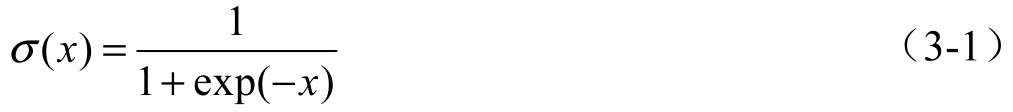

Sigmoid函数曲线与梯度曲线如图所示。可以看到，Sigmoid函数将特征压缩到了(0,1)区间，0端对应抑制状态，而1对应激活状态，中间部分梯度较大。

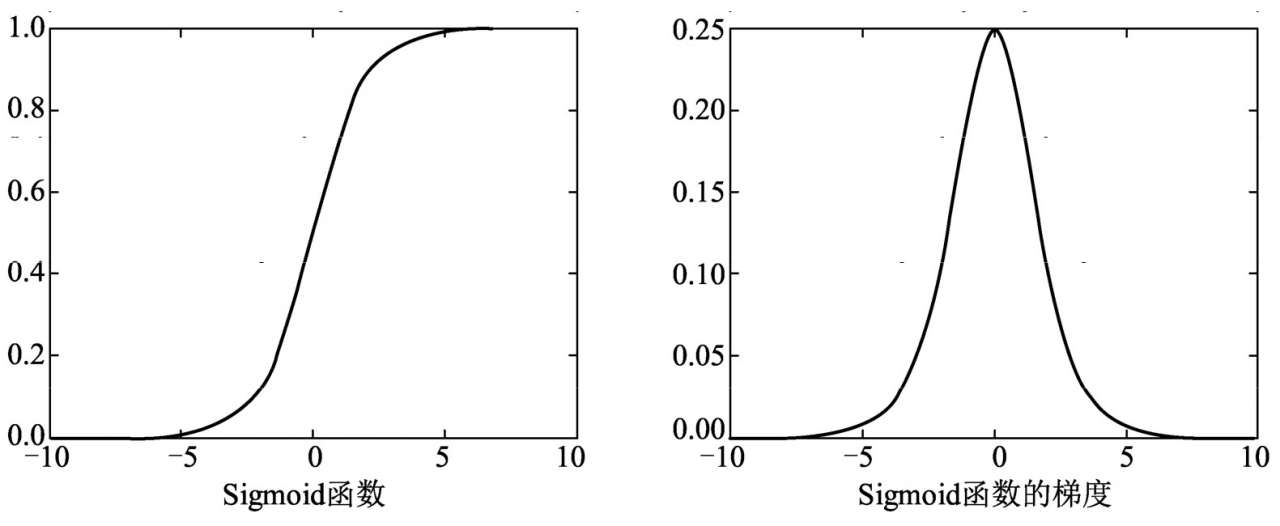

Sigmoid函数可以用来做二分类，但其计算量较大，并且容易出现梯度消失现象。从曲线图中可以看出，在Sigmoid函数两侧的特征导数接近于0，这将导致在梯度反传时损失的误差难以传递到前面的网络层（因为根据链式求导，梯度接近于0）。

In [1]:
import torch
from torch import nn

input = torch.ones(1, 1, 2, 2)
input

tensor([[[[1., 1.],
          [1., 1.]]]])

In [2]:
#使用nn.Sigmoid()实例化sigmoid
sigmoid = nn.Sigmoid()
sigmoid(input)

tensor([[[[0.7311, 0.7311],
          [0.7311, 0.7311]]]])

### 2.ReLU函数
为了缓解梯度消失现象，修正线性单元（Rectified Linear Unit,ReLU）被引入到神经网络中。由于其优越的性能与简单优雅的实现，ReLU已经成为目前卷积神经网络中最为常用的激活函数之一。ReLU函数计算简单，收敛快，并在众多卷积网络中验证了其有效性。

ReLU函数的表达式如式（3-2）所示。

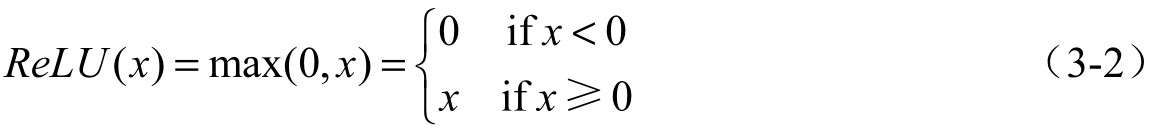

ReLU函数及其梯度曲线如图所示。可以看出，在小于0的部分，值与梯度皆为0，而在大于0的部分中导数保持为1，避免了Sigmoid函数中梯度接近于0导致的梯度消失问题。

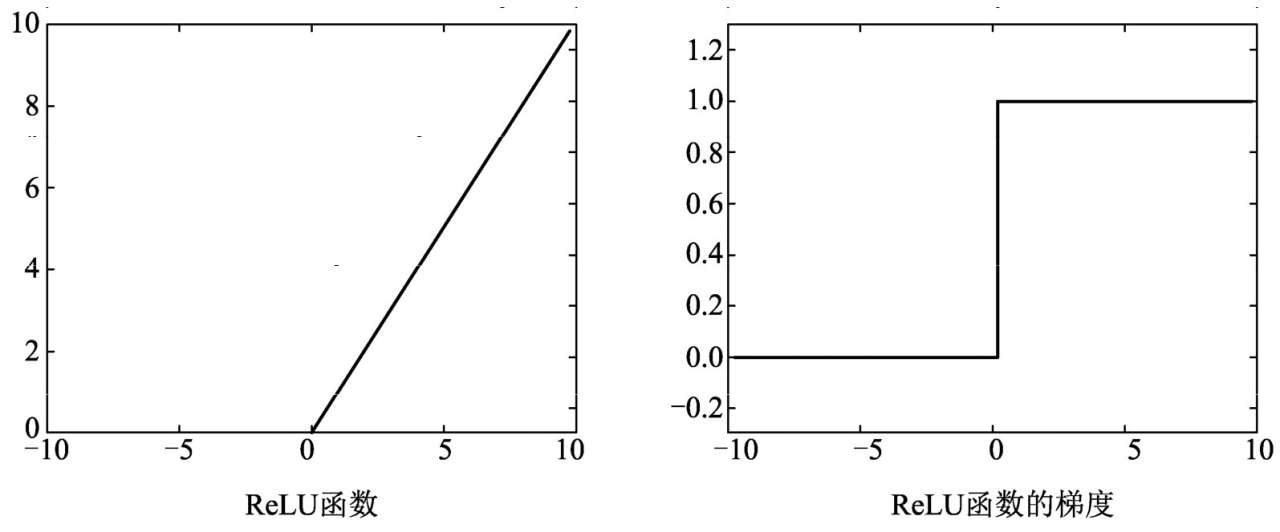

In [3]:
import torch
from torch import nn

input = torch.randn(1, 1, 2, 2)
input

tensor([[[[-1.2001, -0.1655],
          [-0.0638, -0.6171]]]])

In [4]:
#nn.ReLU()函数可以实现in-place操作，即可以直接将运算结果覆盖到输入中，以节省内存
relu = nn.ReLU(inplace=True)

#可以看出大于0的值保持不变，小于0的值被置为0
relu(input)

tensor([[[[0., 0.],
          [0., 0.]]]])

### 3.Leaky ReLU函数
ReLU激活函数虽然高效，但是其将负区间所有的输入都强行置为0,Leaky ReLU函数优化了这一点，在负区间内避免了直接置0，而是赋予很小的权重，其函数表达式如式（3-3）所示。

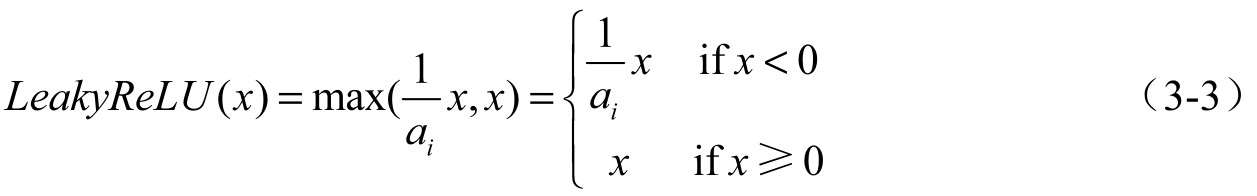

以上公式中的ai代表权重，即小于0的值被缩小的比例。LeakyReLU的函数曲线如图所示。

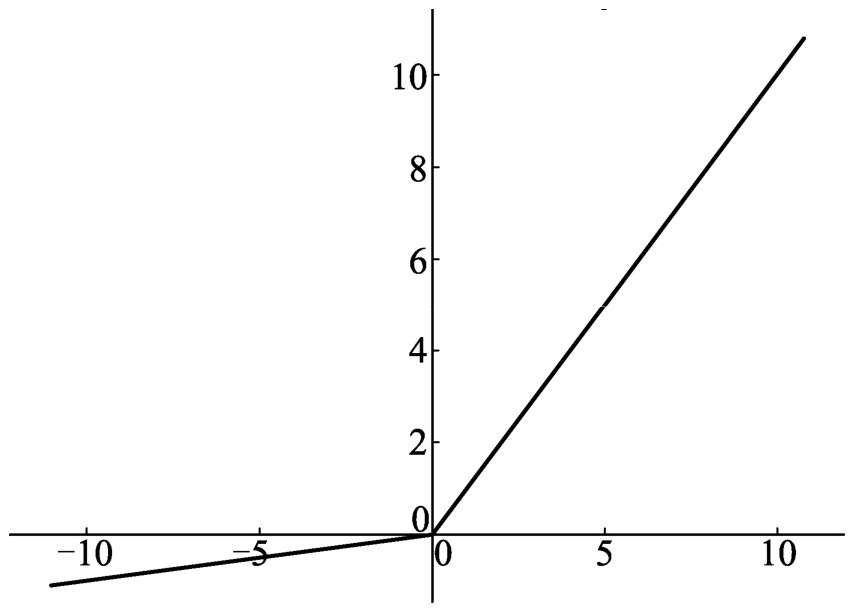

虽然从理论上讲，Leaky ReLU函数的使用效果应该要比ReLU函数好，但是从大量实验结果来看并没有看出其效果比ReLU好。此外，对于ReLU函数的变种，除了Leaky ReLU函数之外，还有PReLU和RReLU函数等，这里不做详细介绍。

In [5]:
import torch
from torch import nn

input  = torch.randn(1, 1, 2, 2)
input

tensor([[[[ 1.2824, -0.3140],
          [ 0.6272,  0.4376]]]])

In [6]:
#利用nn.LeakyReLU()构造激活函数，并且其1/ai为0.04，即ai为25，True代表in-place操作
leakyrelu = nn.LeakyReLU(0.04, True)

#从结果看，大于0的值保持不变，小于0 的值被以0.04的比例缩小
leakyrelu(input)

tensor([[[[ 1.2824, -0.0126],
          [ 0.6272,  0.4376]]]])

### 4.Softmax函数
在物体检测中，通常需要面对多物体分类问题，虽然可以使用Sigmoid函数来构造多个二分类器，但比较麻烦，多物体类别较为常用的分类器是Softmax函数。

在具体的分类任务中，Softmax函数的输入往往是多个类别的得分，输出则是每一个类别对应的概率，所有类别的概率取值都在0~1之间，且和为1。Softmax函数的表达如式（3-4）所示，其中，Vi表示第i个类别的得分，C代表分类的类别总数，输出Si为第i个类别的概率。

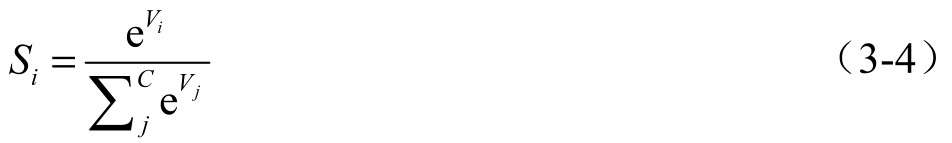

In [7]:
import torch.nn.functional as F

score = torch.randn(1, 4)
score

tensor([[-0.6677,  0.7029, -1.5393,  0.3525]])

In [8]:
#利用torch.nn.functional.softmax()函数，第二个参数表示按照第几个维度进行
F.softmax(score, 1)

tensor([[0.1230, 0.4844, 0.0515, 0.3412]])